[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


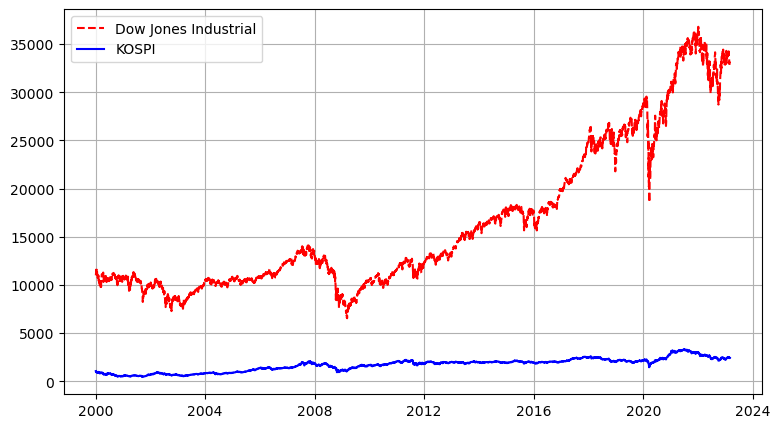

In [1]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

dow = pdr.get_data_yahoo('^DJI','2000-01-04')
kospi = pdr.get_data_yahoo('^KS11', '2000-01-04')

import matplotlib.pyplot as plt
plt.figure(figsize=(9, 5))
plt.plot(dow.index, dow.Close, 'r--', label='Dow Jones Industrial')
plt.plot(kospi.index, kospi.Close, 'b', label='KOSPI')
plt.grid(True)
plt.legend(loc='best')
plt.show()

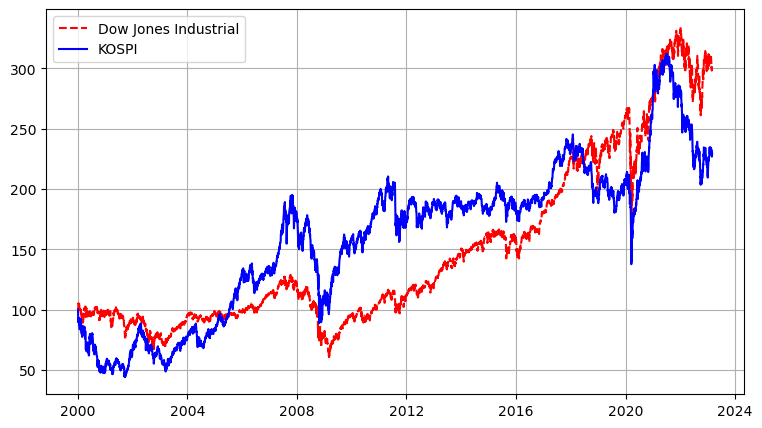

In [3]:
#지수화 비교
d = (dow.Close / dow.Close.loc['2000-01-04']) * 100
k = (kospi.Close / kospi.Close.loc['2000-01-04']) * 100

import matplotlib.pyplot as plt
plt.figure(figsize=(9, 5))
plt.plot(d.index, d, 'r--', label='Dow Jones Industrial')
plt.plot(k.index, k, 'b', label='KOSPI')
plt.grid(True)
plt.legend(loc='best')
plt.show()

In [4]:
#산점도 분석

In [6]:
len(dow), len(kospi)

(5826, 5713)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


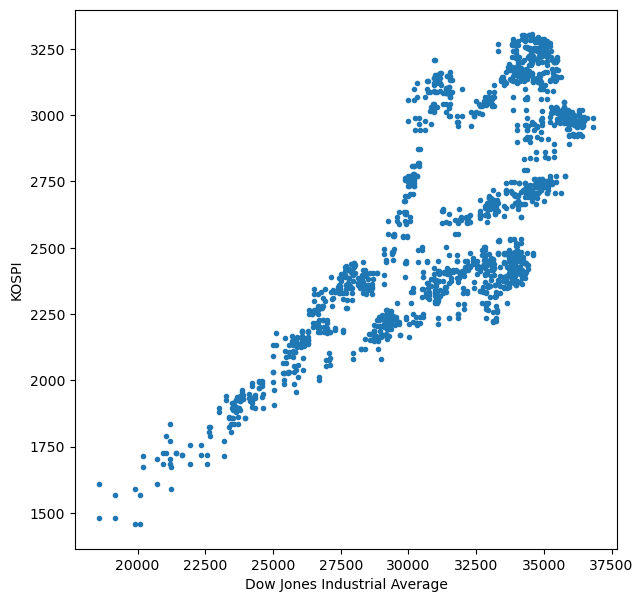

In [11]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

dow = pdr.get_data_yahoo('^DJI', '2020-01-04')
kospi =pdr.get_data_yahoo('^KS11', '2020-01-04')

df = pd.DataFrame({'DOW' : dow['Close'], 'KOSPI' : kospi['Close']})
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')

import matplotlib.pyplot as plt
plt.figure(figsize=(7, 7))
plt.scatter(df['DOW'], df['KOSPI'], marker='.')
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI')
plt.show()

In [12]:
#선형 회귀 분석

In [14]:
!pip install scipy

In [16]:
from scipy import stats 
regr = stats.linregress(df['DOW'], df['KOSPI'])
regr
#slope 기울기
#intercept y절편
#rvalue r값
#pvalue p값
#stderr 표준편차

LinregressResult(slope=0.08879624080232137, intercept=-180.3349730024529, rvalue=0.7851661404747098, pvalue=0.0, stderr=0.0017669961804898235, intercept_stderr=55.86092312155161)

In [17]:
df.corr()

,DOW,KOSPI
DOW,1.000000,0.785166
KOSPI,0.785166,1.000000


In [18]:
# 결정계수 구하기

In [21]:
r_value = df['DOW'].corr(df['KOSPI'])
r_value

0.7851661404747097

In [22]:
# 결정계수는 상관계수를 제곱해 구한다

In [23]:
r_squared = r_value ** 2
r_squared

0.6164858681479515

In [24]:
#다우존스 지수와 KOSPI의 회귀분석

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


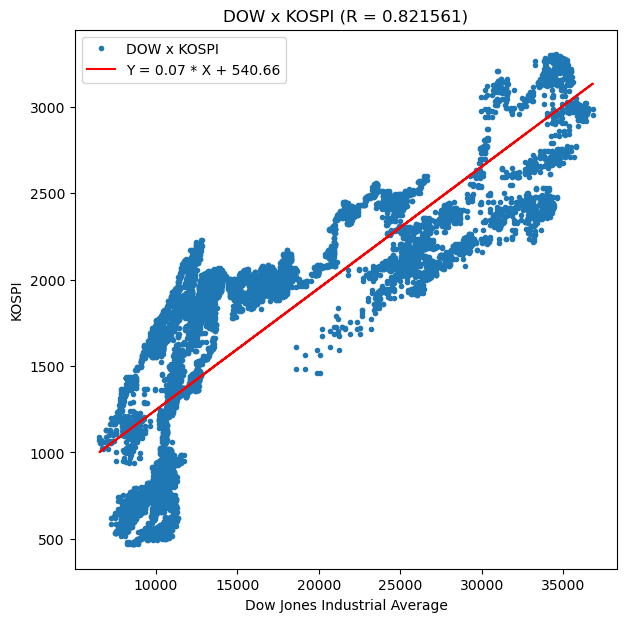

In [27]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
from scipy import stats
import matplotlib.pyplot as plt

dow = pdr.get_data_yahoo('^DJI','2000-01-04')
kospi = pdr.get_data_yahoo('^KS11', '2000-01-04')

df = pd.DataFrame({'X' : dow['Close'], 'Y' : kospi['Close']})
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')

regr = stats.linregress(df.X, df.Y)
regr_line = f'Y = {regr.slope:.2f} * X + {regr.intercept:.2f}'

plt.figure(figsize=(7, 7))
plt.plot(df.X, df.Y, '.')
plt.plot(df.X, regr.slope * df.X + regr.intercept, 'r')
plt.legend(['DOW x KOSPI', regr_line])
plt.title(f'DOW x KOSPI (R = {regr.rvalue:2f})')
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI')
plt.show()